# Исследование определяющих успешность игры закономерностей

 **Цель исследования** – выявить определяющие успешность игры закономерности для предсказания потенциально популярного продукта и планирования рекламной кампании.

 **Входные данные** представляют собой датасет с данными об играх до 2016 года. 

 **Описание данных**:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

 **План исследования**:
- открытие датасета и ознакомление с ним;
- предобработка данных;
- исследовательский анализ данных;
- составление портретов пользователей из различных регионов;
- проверка гипотез;
- общий вывод.

## Ознакомление с датасетом

Откроем датасет и ознакомимся с ним.

In [1]:
# import 'pandas', 'matplotlib.pyplot' and 'scipy.stats' library
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# open file
path = '/Users/aleksandrdudakov/Downloads'
df = pd.read_csv(path + '/games.csv')

In [3]:
# 10 random rows of df
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9696,NHL 2002,GBA,2002.0,Sports,0.09,0.03,0.00,0.00,NaN,tbd,E
5698,MonHun Nikki: Poka Poka Ailu Mura G,PSP,2011.0,Role-Playing,0.00,0.00,0.31,0.00,NaN,NaN,NaN
15886,Irritating Stick,PS,1998.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
4553,Mega Man Battle Network,GBA,2001.0,Role-Playing,0.14,0.05,0.22,0.01,79.0,8.9,E
6672,F1 Pole Position 64,N64,1997.0,Racing,0.11,0.13,0.00,0.01,NaN,NaN,NaN
15371,Resident Evil Zero,PC,2016.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
15441,Onechanbara Special,PSP,2011.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14529,Kyokugen Dasshutsu ADV: Zennin Shiboudesu,3DS,2012.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
2797,Mortal Kombat 4,N64,1998.0,Fighting,0.55,0.17,0.00,0.01,NaN,NaN,NaN
12641,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,0.00,0.05,0.00,0.00,58.0,7.5,E10+


In [4]:
# general information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# describe df columns
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# distribution of values in every column of df
for value in df:
    print(df[value].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO 

Опишем замеченные ошибки и проблемы:
- *пропуски*: в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;
- *регистр*: нужно привести названия столбцов к нижнему регистру;
- непонятное значение `tbd` в столбце `User_Score`;
- неверный *тип данных*: нужно изменить тип данных `Year_of_Release` в 'int', `Critic_Score` в 'int', `User_Score` в 'float' (если получится разобраться с пунктом выше).
- *дубликаты*: некоторые названия игр повторяются;
- изучить столбец `Rating`.

### Вывод

Был открыт файл с данными и были описаны ошибки в нем.

## Подготовка данных

### Замена названия столбцов

Приведем названия столбцов к нижнему регистру.

In [7]:
# lower names of columns
df.columns = df.columns.str.lower()

Проверим.

In [8]:
# show 5 first rows of df
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Пропуски есть в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Посчитаем их долю.

In [9]:
# rate of missing values in every column in percents
df.isna().mean() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В столбцах `name`, `year_of_release` и `genre` пропусков очень мало (меньше 2%). Это, видимо, какие-то технические пропуски. Удалим их.

In [10]:
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

В столбцах `critic_score`, `user_score`, `rating` пропусков очень много (около половины строк), поэтому заменим пропущенные значения значением значениями `-1` и `unknown`.

In [11]:
# fill missing values
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna('-1')
df['rating'] = df['rating'].fillna('unknown')

Проверим.

In [12]:
# rate of missing values in every column in percents
df.isna().mean() * 100

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Из [открытых источников](https://www.metacritic.com/faq#item13) было выяснено, что `tbd` в столбце `user_score` означает, что оставлено слишком мало оценок, чтобы можно было их показывать. Посчитаем долю таких значений.

In [13]:
# rate of 'tbd' values in 'user_score' values
len(df[df['user_score'] == 'tbd']) / len(df['user_score'])

0.14449039163220628

Поступим с этим значением так же, как с пропущенными значениями: заменим на -1.

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-1'

### Приведение данных к нужным типам

Приведем тип данных столбца `year_of_release` к типу 'int'. Также приведем к типу 'int' столбец `critic_score`, так как его значения – это целы положительная числа до 100.

In [15]:
# change type of 'year_of_release' and 'critic_score' columns to 'int'
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')

Теперь, когда мы удалили значения `tbd` из столбца `user_score`, приведем его тип к 'float'.

In [16]:
# change type of 'user_score' column to 'float'
df['user_score'] = df['user_score'].astype('float')

Проверим.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Обработка дубликатов

Некоторые названия игр повторяются.

In [18]:
df['name'] = df['name'].str.lower()
df['name'].value_counts()

need for speed: most wanted               12
lego marvel super heroes                   9
ratatouille                                9
fifa 14                                    9
terraria                                   8
                                          ..
loving life with hello kitty & friends     1
scrabble (others sales)                    1
viva pinata: party animals                 1
sands of destruction                       1
haitaka no psychedelica                    1
Name: name, Length: 11426, dtype: int64

Посмотри, например, на строки 'Need for Speed: Most Wanted'.

In [19]:
df[df['name'] == 'need for speed: most wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,need for speed: most wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1,-1.0,unknown
1190,need for speed: most wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,need for speed: most wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,need for speed: most wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,need for speed: most wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1,-1.0,unknown
3581,need for speed: most wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,need for speed: most wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,need for speed: most wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,-1,-1.0,unknown
6410,need for speed: most wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


Видим, что это игры, выпущенные на разных платформах либо в разные годы. Найдем игры, у которых совпадает и название, и платформ

In [20]:
# find duplicates of 'name', 'platform', 'year_of_release' columns
df[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Удалим строку 16230.

In [21]:
# drop row
df = df.drop(16230).reset_index(drop=True)

Проверим.

In [22]:
# find duplicates of 'name', 'platform', 'year_of_release' columns
df[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Посчитаем количество явных дубликатов. 

In [23]:
# number of duplicates
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Исследование рейтинга

Рейтинг выставляет организация ESPB. [Действующие рейтинги](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Ratings): RP, E, E10+, T, M, AO.

In [24]:
df['rating'].value_counts()

unknown    6676
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Недействительные рейтинги, присутствующие в нашем датафрейме: EC, K-A. K-A – это старое название E, EC (Early Chilhood) перестал использоваться в 2018, можно считать эквивалентным E (Everyone). Заменим.

In [25]:
df.loc[(df['rating'] == 'K-A') | (df['rating'] == 'EC'), 'rating'] = 'E'

Проверим.

In [26]:
df['rating'].value_counts()

unknown    6676
E          3931
T          2905
M          1536
E10+       1393
AO            1
RP            1
Name: rating, dtype: int64

### Добавление нового столбца

Создадим столбец с суммарными продажами по всем регионам.

In [27]:
# create 'general_sales' column
df['general_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Проверим.

In [28]:
# show 5 first rows of df
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


### Вывод

Данные были предобработаны:
- столбцы были переименованы в соответствие змеиному регистру;
- были обработаны пропущенные значения: в столбцах `name`, `year_of_release`, `genre` они были удалены (так как их очень мало), а в столбцах `critic_score`, `user_score`, `rating` пропуски были заменены нулем и был создан столбец-флаг, обозначающий что в одном их этих столбцов был пропуск (True: пропуск был, False: пропуска не было);
- данные были приведены к нужному типу: столбец `year_of_release` в 'int', `critic_score` в 'int', `user_score` в 'float';
- датасет был проверен на наличие дубликатов: дубликатов обнаружено не было;
- были заменены устаревшие рейтинги в столбце `rating`;
- был создан новый столбец `general_sales` с данными о суммарных продажах по всем регионам.

## Исследовательский анализ данных

### Распределение игр по годам

Построим график количества игр по годам.

<AxesSubplot:title={'center':'distribution of number of games by years'}, xlabel='year of release', ylabel='number of released games'>

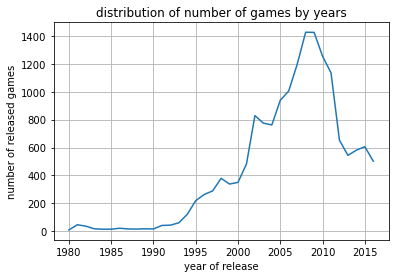

In [29]:
# plot number of games distribution for each year
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, xlabel='year of release', ylabel='number of released games', title='distribution of number of games by years', legend=False)

До середины 90-х количество выпускаемых игр было малым, потом сильно возросло, и начиная с начала 10-х стабилизировалось около 500. Будем считать, что нам важны данные, начиная с 2012 года (с этого года количество выпущенных игр колебается около 500).

In [30]:
df_temp = df[(df['year_of_release'] >= 2012)]

### Исследование продаж по платформам

Найдем самые популярные платформы за период 2012-2016.

In [31]:
# create pivot table of general sales distribution for each platform
df_temp.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False)

,general_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Для исследования возьмем 5 самых популярных платформ: PS4, PS3, XOne, 3DS и X360.

Создадим сводную таблицу с значениями общих продах по году для каждой из этих платформ.

In [32]:
# create pivot table of general sales per year for top 5 platforms
df_temp = df[(df['platform'] == 'PS4') | (df['platform'] == 'PS3') | (df['platform'] == 'XOne') | (df['platform'] == '3DS') | (df['platform'] == 'X360')]
df_pivot = df_temp.pivot_table(index=['platform', 'year_of_release'], values=['general_sales'], aggfunc='sum').reset_index()
df_pivot

,platform,year_of_release,general_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,PS3,2006,20.96
7,PS3,2007,73.19
8,PS3,2008,118.52
9,PS3,2009,130.93


Построим графики распределения общих продах по годам для топ-5 платформ (2016 брать в расчет не будем, так как данные неполные).

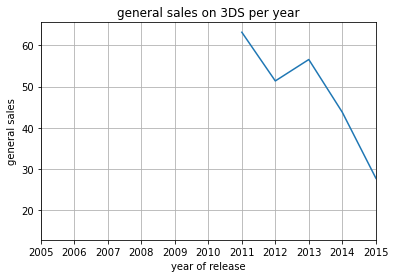

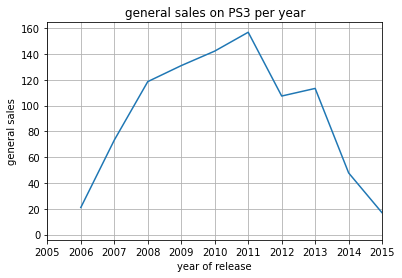

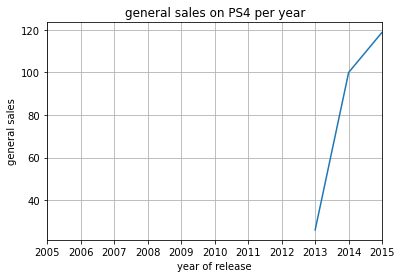

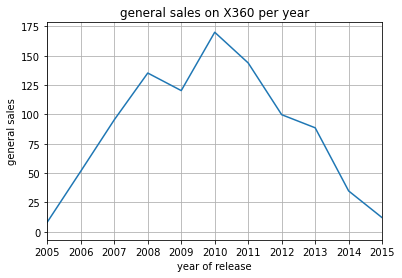

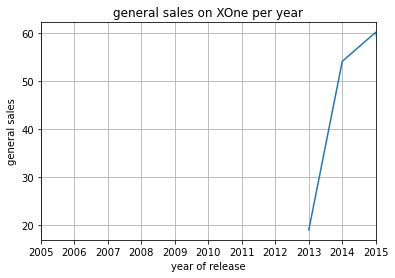

In [33]:
# plot distribution of general sales per year for top 5 platforms
for value in df_pivot['platform'].unique():
    df_pivot[df_pivot['platform'] == value].plot(x='year_of_release', y='general_sales', xlabel='year of release', ylabel='general sales', title=f'general sales on {value} per year', grid=True, xticks=range(2005, 2016), xlim=(2005, 2015), legend=False)

Видим, что набирают популярность недавно появившиеся платформы (PS4 и XOne), а остальные – теряют популярность (3DS, PS3, X360).

Также заметим, что характерное время исчезания популярной платформы – около 10 лет.

Для нашего исследования возьмем данные, начиная с 2014 года (они лучше всего будут характеризовать ситуацию на рынке сейчас).

In [34]:
df = df[df['year_of_release'] >= 2014]

Проверим.

In [35]:
df['year_of_release'].value_counts()

2015    606
2014    581
2016    502
Name: year_of_release, dtype: int64

Найдем самые популярные платформы.

In [36]:
# create pivot table of general sales distribution for each platform
df.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False)

,general_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Платформы-лидеры продаж – PS4, XOne, 3DS, PS3, X360.

Построим график "ящик с усами" для каждой платформы.

(0.0, 1.75)

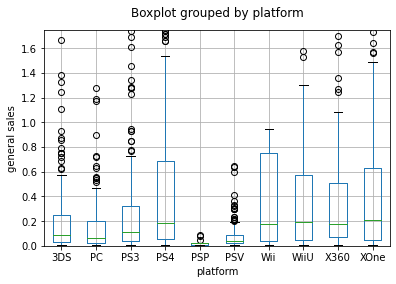

In [37]:
# plot 'general_sales' quantile
df.boxplot(column='general_sales', by='platform')

plt.title('')
plt.ylabel('general sales')
plt.ylim(0, 1.75)

Видим, что хорошие продажи у игр, выходящих на PS4, XOne, WiiU,  Wii и X360, у остальные платформ продажи низкие.

### Исследование влияния отзывов на продажи

Посмотрим, как влияют на продажи отзывы критиков и пользователей для самой популярной платформы - PS4.
Посчитаем корреляцию и построим диаграммы рассеяния.

Корреляция между отзывами критиков и продажами 0.40190287811475334
Корреляция между отзывами пользователей и продажами -0.04318585997193634


<AxesSubplot:title={'center':'scatter plot of user score and general sales for PS4'}, xlabel='general sales', ylabel='user score'>

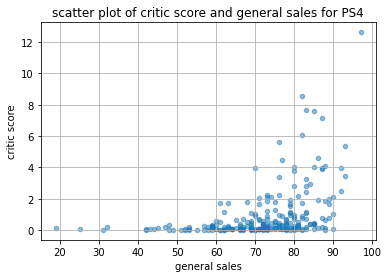

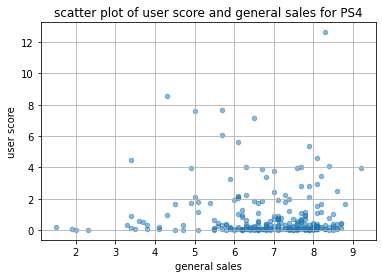

In [38]:
# create dataframe of PS4 games without missing values
ps4_df = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0) & (df['user_score'] > 0)]


# calculate correlations
print('Корреляция между отзывами критиков и продажами', ps4_df['critic_score'].corr(ps4_df['general_sales']))
print('Корреляция между отзывами пользователей и продажами', ps4_df['user_score'].corr(ps4_df['general_sales']))

# plot scatter
ps4_df.plot(x='critic_score', y='general_sales', xlabel='general sales', ylabel='critic score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of critic score and general sales for PS4')
ps4_df.plot(x='user_score', y='general_sales', xlabel='general sales', ylabel='user score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of user score and general sales for PS4')

Как мы видим, есть небольшая корреляция между отзывами критиков и продажами и совсем нет связи между отзывами пользователей и продажами.

Также изучим влияние отзывов на продажи для XOne.

Корреляция между отзывами критиков и продажами 0.42211185105557647
Корреляция между отзывами пользователей и продажами -0.0917343450331075


<AxesSubplot:title={'center':'scatter plot of user score and general sales for XOne'}, xlabel='general sales', ylabel='user score'>

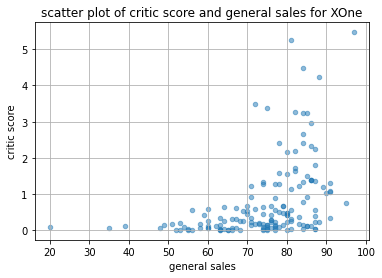

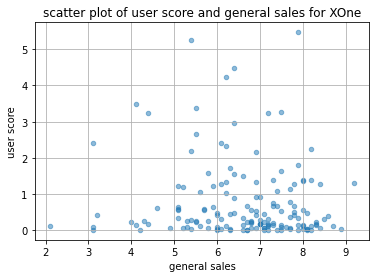

In [39]:
# create dataframe of XOne games without missing values
xone_df = df[(df['platform'] == 'XOne') & (df['critic_score'] > 0) & (df['user_score'] > 0)]


# calculate correlations
print('Корреляция между отзывами критиков и продажами', xone_df['critic_score'].corr(xone_df['general_sales']))
print('Корреляция между отзывами пользователей и продажами', xone_df['user_score'].corr(xone_df['general_sales']))

# plot scatter
xone_df.plot(x='critic_score', y='general_sales', xlabel='general sales', ylabel='critic score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of critic score and general sales for XOne')
xone_df.plot(x='user_score', y='general_sales', xlabel='general sales', ylabel='user score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of user score and general sales for XOne')

Ситуация аналогична платформе PS4.

Теперь рассмотрим платформу 3DS.

Корреляция между отзывами критиков и продажами 0.28468579095782925
Корреляция между отзывами пользователей и продажами 0.2798498792503281


<AxesSubplot:title={'center':'scatter plot of user score and general sales for 3DS'}, xlabel='general sales', ylabel='user score'>

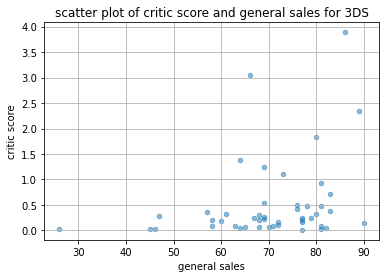

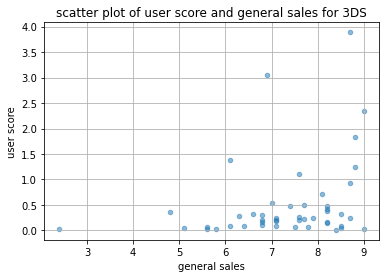

In [40]:
# create dataframe of PS4 games without missing values
tds_df = df[(df['platform'] == '3DS') & (df['critic_score'] > 0) & (df['user_score'] > 0)]


# calculate correlations
print('Корреляция между отзывами критиков и продажами', tds_df['critic_score'].corr(tds_df['general_sales']))
print('Корреляция между отзывами пользователей и продажами', tds_df['user_score'].corr(tds_df['general_sales']))

# plot scatter
tds_df.plot(x='critic_score', y='general_sales', xlabel='general sales', ylabel='critic score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of critic score and general sales for 3DS')
tds_df.plot(x='user_score', y='general_sales', xlabel='general sales', ylabel='user score', kind='scatter', grid=True, alpha=0.5, title='scatter plot of user score and general sales for 3DS')

Для 3DS ситуация отличается: есть примерно одинаковая небольшая корреляция между продажами и отзывами критиков/пользователей.

### Исследование распределения продаж по жанра

Посчитаем медианные общие продажи для каждого жанра и построим график.

<AxesSubplot:xlabel='genre'>

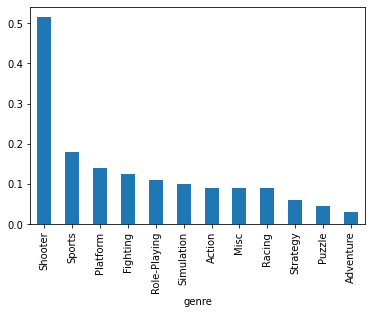

In [41]:
# create pivot table of median general sales per genre
df.pivot_table(index=['genre'], values='general_sales', aggfunc='median').reset_index().sort_values('general_sales', ascending=False).reset_index(drop=True).plot(x='genre', y='general_sales', kind='bar', legend=False)

Видим, что самые прибыльные жанры – Shooter, Sports, Platform, Fighting и Role-Playing, наименее прибыльные – Adventure, Puzzle и Strategy.

### Вывод
Был проведен исследовательский анализ данных:
- было изучено распределение количества игр по годам и был выбран 2012 год, как год начала нового периода, интересного нам в исследовании;
- было исследовано распределение продаж по платформам (для исследования был выбрат период 2014-2016): самыми популярными платформами оказались PS4, XOne, 3DS, PS3, X360 (также было замечено что первые две продолжают набирать популярность, а остальные становятся менее популярными);
- было выяснено, что для самых популярных платформ есть связь между отзывами критиков и продажами, но нет связи между отзывами пользователей и продажами (но так как было много пропусков в столбце с отзывами, то, возможно, что критики просто чаще оставляют отзывы на часто продаваемые и качественные игры);
- были найдены наиболее прибыльные (Shooter, Sports, Platform, Fighting и Role-Playing) и наименее прибыльные жанры игр (Adventure, Puzzle и Strategy).

## Составление портрета пользователя каждого региона

### Портрет пользователя из Северной Америки

Найдем топ-5 самых популярных платформ в Северной Америке.

In [42]:
# create pivot table of NA sales distribution for top 5 platforms
df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Найдем топ-5 самых популярных жанров в Северной Америке.

In [43]:
# create pivot table of NA sales distribution for top 5 genres
df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


### Портрет пользователя из Европы

Найдем топ-5 самых популярных платформ в Европе.

In [44]:
# create pivot table of EU sales distribution for top 5 platforms
df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Найдем топ-5 самых популярных жанров в Европе.

In [45]:
# create pivot table of EU sales distribution for top 5 genres
df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


### Портрет пользователя из Японии

Найдем топ-5 самых популярных платформ в Японии.

In [46]:
# create pivot table of JP sales distribution for top 5 platforms
df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Найдем топ-5 самых популярных жанров в Японии.

In [47]:
# create pivot table of JP sales distribution for top 5 genres
df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


### Проверка влияния рейтинга игры на продажи

Построим график "ящик с усами" (без выбросов) продаж в Северной Америке, Европе и Японии и рейтинга игры.

(0.0, 0.3)

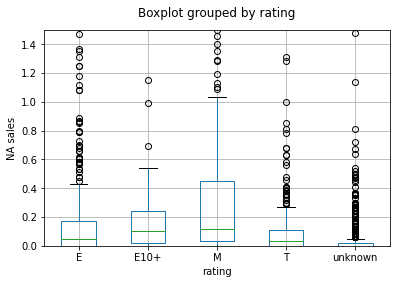

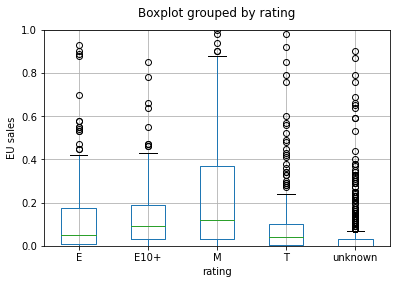

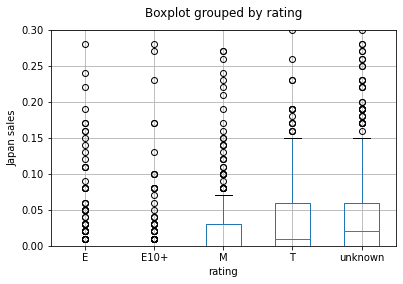

In [48]:
# plot 'general_sales' quantile
df.boxplot(column='na_sales', by='rating')

plt.title('')
plt.ylabel('NA sales')
plt.ylim(0, 1.5)


# plot 'general_sales' quantile
df.boxplot(column='eu_sales', by='rating')

plt.title('')
plt.ylabel('EU sales')
plt.ylim(0, 1)


# plot 'general_sales' quantile
df.boxplot(column='jp_sales', by='rating')

plt.title('')
plt.ylabel('Japan sales')
plt.ylim(0, 0.3)

In [49]:
# create pivot table of sales in NA, EU and JP and ratings
df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')

,eu_sales,jp_sales,na_sales
rating,,,
E,0.265114,0.040822,0.231689
E10+,0.141405,0.024108,0.179622
M,0.352604,0.030226,0.363849
T,0.125720,0.054539,0.143727
unknown,0.078705,0.075968,0.086409


### Вывод
Были составлены портреты пользователей из Северной Америки, Европы и Японии: в Северной Америке и Европе портреты очень похожи (самые популярные платформы – PS4 и ХOne, самые популярные жанры – Shooter, Action, Sport), это объясняется культурной близостью этих частей света. Ситуация в Японии другая: помимо PS4 популярны портативные платформы, такие как 3DS, PSV, WiiU, а в среди жанров игр популярны Role-Playing, Action и Fighting.
Также мы видим, что в Северной Америке и Европе лучшие продажи у игр для взрослых (рейтинг М), а в Японии – у игр для всех (рейтинг E). (Было замечено, что у игр без рейтинга очень низкие продажи: можно предположить, что пропуски в столбце `rating` у самых не популярных игр, которые не прошли процедуру проверки ESBR.)

## Проверка гипотез

Проверим две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports одинаковые.

Так как наши выборки – это генеральные совокупности, то для проверки гипотезы будем использовать метод `ttest_ind`.

### Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Нулевая гипотеза $H_0$: средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.

Альтернативная гипотеза $H_1$: средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу платформы PC.

In [50]:
# create xone dataframe and pc dataframe
xone_df = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]
pc_df = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]

# critical p-value
alpha = 0.05

# t-test
results = st.ttest_ind(xone_df['user_score'], pc_df['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Для дополнительного подтверждения гипотезы посчитаем среднее и медианц каждой генеральной совокупности.

In [51]:
print(f"Средняя и медианная выручка пользователей платформы XOne: {xone_df['user_score'].mean()}, {xone_df['user_score'].median()}")
print(f"Средняя и медианная выручка пользователей платформы PC: {pc_df['user_score'].mean()}, {pc_df['user_score'].median()}")

Средняя и медианная выручка пользователей платформы XOne: 6.594545454545453, 6.8
Средняя и медианная выручка пользователей платформы PC: 6.298360655737703, 6.8


На самом деле, средние значения пользовательского рейтинга платформ XOne и PC очень близки, а медианы и вовсе равны.

### Проверка гипотезы о неравенстве средних пользовательских рейтингов жанров Action и Sports

Нулевая гипотеза $H_0$: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза $H_1$: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

In [52]:
# create xone dataframe and pc dataframe
action_df = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]
sports_df = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]

# critical p-value
alpha = 0.05

# t-test
results = st.ttest_ind(action_df['user_score'], sports_df['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Посчитаем среднее и медиану.

In [53]:
print(f"Средняя и медианная выручка пользователей платформы XOne: {action_df['user_score'].mean()}, {action_df['user_score'].median()}")
print(f"Средняя и медианная выручка пользователей платформы PC: {sports_df['user_score'].mean()}, {sports_df['user_score'].median()}")

Средняя и медианная выручка пользователей платформы XOne: 6.760606060606054, 7.1
Средняя и медианная выручка пользователей платформы PC: 5.225196850393697, 5.5


Видим, что средние пользовательские рейтинги жанров Action и Sports, на самом деле, довольно сильно отличаются.

### Вывод

С помощью t-теста были проверены две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports одинаковые.

Первая гипотеза были подтверждена, а вторая опровергнута.

## Общий вывод
Были изучены и проанализированы данные об играх, их продажах в различных регионах, жанрах, оценок пользователей и критиков, платформах:
- была выполнена предобработка данных: названия столбцов были переименовы в соответсвии с змеиным регистром, были обработаны пропущенные значения, данные были приведены к нужным типам, были исправлены ошибки в рейтинге игр (устаревшие рейтинги были заменены на действительные), были посчитаны общие продажи;
- был проведен исследовательский анализ данных: для исследования был выбран период 2014-2016 как подходящий для прогнозирования популярности игры; были найдены самые популярные платформы: PS4, XOne, 3DS, PS3, X360; была определена связь между отзывами критиков и продажими (связи между отзывами пользователей и продажами найдено не было); были найдены наиболее доходные жанры (Shooter, Sports, Platform, Fighting и Role-Playing) и наименее доходные жанры (Adventure, Puzzle и Strategy);
- были составлены портреты пользователей из Северной Америки, Европы и Японии: посчитаны топ-5 платформ и жанров в каждом регионе, а также было изучено влияние рейтинга на продажи (в Северной Америке и Европе наибольшие продажи у игр с рейтингом M, а в Японии – у игр с рейтингов E);
- были сформулированы и проверены две гипотезы: 1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. средние пользовательские рейтинги жанров Action и Sports разные. Обе гипотезы были подтверждены.